In [52]:
!pip install folium

In [131]:
import requests
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os
import plotly.express as px

In [54]:
api_key= 'Q0dGwScJ.EdgL1P5wLue7rrlFaIjQsr27LwbZyjzu'
url= 'https://api.patentsview.org/patents/query'
params= {
    'q': '{"_gte": {"patent_date":"2023-03-31"}}', #end date is march 31, 2024
    'f': '["patent_number", "patent_title", "assignee_city", "assignee_state", "assignee_country"]',
    'o': '{"per_page":"10000"}',
    'api_key': api_key
}

response = requests.get(url, params=params)
patent_data = response.json()


In [55]:
if 'patents' in patent_data:
    for patent in patent_data['patents']:
        assignees = patent.get('assignees', [])
        if assignees:
            assignee = assignees[0]
            latitude = assignee.get('assignee_latitude')
            longitude = assignee.get('assignee_longitude')
            print(f"Patent Number: {patent['patent_number']}, Title: {patent['patent_title']}, Latitude: {latitude}, Longitude: {longitude}")
else:
    print("No patents found in the response.")


Patent Number: 11617292, Title: Method for controlling the operation of an attachment, Latitude: None, Longitude: None
Patent Number: 11617293, Title: Hitch assembly for a work vehicle, Latitude: None, Longitude: None
Patent Number: 11617294, Title: Orientation control system for an agricultural implement, Latitude: None, Longitude: None
Patent Number: 11617295, Title: Dynamic supplemental downforce control system for planter row units, Latitude: None, Longitude: None
Patent Number: 11617296, Title: Agricultural machine equipped with a distribution tie-rod, Latitude: None, Longitude: None
Patent Number: 11617297, Title: Agricultural vehicle-trailer combination, Latitude: None, Longitude: None
Patent Number: 11617298, Title: Agricultural product delivery applicator with a pneumatic conveying system having a distributor assembly, Latitude: None, Longitude: None
Patent Number: 11617299, Title: System and method for regulating and dispensing seeds, fertilizer, and other items, Latitude: No

In [56]:
print(patent_data['patents'][0])

{'patent_number': '11617292', 'patent_title': 'Method for controlling the operation of an attachment', 'assignees': [{'assignee_city': 'Moline', 'assignee_state': 'IL', 'assignee_country': 'US', 'assignee_key_id': 110}]}


In [57]:
us_patents= []
i= 0
if 'patents' in patent_data:
    for patent in patent_data['patents']:
        assignees = patent.get('assignees', [])
        if assignees:
            assignee = assignees[0]
            city = assignee.get('assignee_city')
            state = assignee.get('assignee_state')
            country= assignee.get('assignee_country')
            i= i + 1
            #print(f"Patent Number {i}: {patent['patent_number']}, Title: {patent['patent_title']}, City: {city}, State: {state}, Country: {country}")

            if country== 'US':
                us_patents.append(patent)
                
else:
    print("No patents found in the response.")

print(len(us_patents))

4797


In [58]:
us_patents[0]

{'patent_number': '11617292',
 'patent_title': 'Method for controlling the operation of an attachment',
 'assignees': [{'assignee_city': 'Moline',
   'assignee_state': 'IL',
   'assignee_country': 'US',
   'assignee_key_id': 110}]}

In [59]:
df = pd.json_normalize(us_patents, 
                       record_path='assignees', 
                       meta=['patent_number', 'patent_title'], 
                       errors='ignore')

In [60]:
df

,assignee_city,assignee_state,assignee_country,assignee_key_id,patent_number,patent_title
0,Moline,IL,US,110,11617292,Method for controlling the operation of an att...
1,Moline,IL,US,110,11617293,Hitch assembly for a work vehicle
2,New Holland,PA,US,278,11617294,Orientation control system for an agricultural...
3,Tremont,IL,US,11209,11617295,Dynamic supplemental downforce control system ...
4,Moline,IL,US,110,11617297,Agricultural vehicle-trailer combination
...,...,...,...,...,...,...
4879,San Jose,CA,US,17827,11627372,Media channel identification with multi-match ...
4880,Washington,DC,US,329040,11627373,Systems and methods for providing survey data ...
4881,West Hollywood,CA,US,3462,11627375,Methods and systems for generating and providi...
4882,Suwanee,GA,US,5150,11627377,Set-top box ambiance and notification controller


In [61]:
# Group by city and state, count occurrences
df_counts = df.groupby(["assignee_city", "assignee_state"]).size().reset_index(name="Counts")

In [62]:
# Rename columns
df_counts.columns = ["City", "State", "Counts"]

In [63]:
df_counts_sorted= df_counts.sort_values(by="Counts", ascending=False)
df_counts_sorted.reset_index(drop= True, inplace= True)
df_counts_sorted

,City,State,Counts
0,San Jose,CA,159
1,Armonk,NY,156
2,San Francisco,CA,154
3,Santa Clara,CA,152
4,San Diego,CA,140
...,...,...,...
914,Charleston,SC,1
915,Chatham,NJ,1
916,Miamisburg,OH,1
917,Cheektowaga,NY,1


In [64]:
#df_counts_sorted.to_csv('All_cities_sorted_dataframe.csv')

In [65]:
coord_1= {'San Jose, CA': (37.3361663, -121.890591),
 'Armonk, NY': (41.1264847, -73.7139777),
 'San Francisco, CA': (37.7792588, -122.4193286),
 'Santa Clara, CA': (37.2333253, -121.6846349),
 'San Diego, CA': (32.7174202, -117.162772),
 'Mountain View, CA': (37.3893889, -122.0832101),
 'New York, NY': (40.7127281, -74.0060152),
 'Seattle, WA': (47.6038321, -122.330062),
 'Chicago, IL': (41.8755616, -87.6244212),
 'Houston, TX': (29.7589382, -95.3676974),
 'Dearborn, MI': (42.3222599, -83.1763145),
 'Cupertino, CA': (37.3228934, -122.0322895),
 'Redmond, WA': (47.6694141, -122.1238767),
 'Boise, ID': (43.6166163, -116.200886),
 'Charlotte, NC': (35.2272086, -80.8430827),
 'Atlanta, GA': (33.7489924, -84.3902644),
 'Cambridge, MA': (42.3656347, -71.1040018),
 'Austin, TX': (30.2711286, -97.7436995),
 'Menlo Park, CA': (37.4519671, -122.177992),
 'Palo Alto, CA': (37.4443293, -122.1598465),
 'Boston, MA': (42.3554334, -71.060511),
 'McLean, VA': (38.9342888, -77.1776327),
 'Wilmington, DE': (39.7459468, -75.546589),
 'Santa Monica, CA': (34.0194704, -118.491227),
 'Dallas, TX': (32.7762719, -96.7968559),
 'Washington, DC': (38.8950368, -77.0365427),
 'Sunnyvale, CA': (37.3688301, -122.036349),
 'Philadelphia, PA': (39.9527237, -75.1635262),
 'Spring, TX': (30.0795707, -95.4187924),
 'Minneapolis, MN': (44.9772995, -93.2654692),
 'Las Vegas, NV': (36.1672559, -115.148516),
 'Hopkinton, MA': (42.2288875, -71.5196439),
 'Detroit, MI': (42.3315509, -83.0466403),
 'Plano, TX': (33.0136764, -96.6925096),
 'Irvine, CA': (33.6856969, -117.825981),
 'Bellevue, WA': (47.6144219, -122.192337),
 'Denver, CO': (39.7392364, -104.984862),
 'Mansfield, MA': (42.0334326, -71.2189405),
 'Oakland, CA': (37.8044557, -122.271356),
 'Chesterfield, MO': (38.661953, -90.5643258),
 'Farmington, CT': (41.7198216, -72.8320435),
 'Arlington, VA': (38.8769326, -77.0893094),
 'Cincinnati, OH': (39.1014537, -84.5124602),
 'Pittsburgh, PA': (40.4416941, -79.9900861),
 'Schenectady, NY': (42.8142432, -73.9395687),
 'Beaverton, OR': (45.4871723, -122.80378),
 'Scottsdale, AZ': (33.4942189, -111.926018),
 'Redwood City, CA': (37.4863239, -122.232523),
 'Redwood Shores, CA': (37.5318804, -122.2480219),
 'San Mateo, CA': (37.496904, -122.3330573),
 'Auburn Hills, MI': (42.6875323, -83.2341028),
 'Waltham, MA': (42.3756401, -71.2358004),
 'Torrance, CA': (33.8371392, -118.3413606),
 'Indianapolis, IN': (39.7683331, -86.1583502),
 'Milwaukee, WI': (43.0386475, -87.9090751),
 'Benton Harbor, MI': (42.1167065, -86.4541894),
 'Carlsbad, CA': (33.1580933, -117.3505966),
 'Peoria, IL': (40.6938609, -89.5891008),
 'San Antonio, TX': (29.4246002, -98.4951405),
 'Suwanee, GA': (34.0514898, -84.0712997),
 'New Holland, PA': (40.1017643, -76.085227),
 'Durham, NC': (35.996653, -78.9018053),
 'Pleasanton, CA': (37.6624312, -121.8746789),
 'Los Angeles, CA': (34.0536909, -118.242766),
 'Plantation Gardens, FL': (26.1298084, -80.2375483),
 'Round Rock, TX': (30.5085915, -97.6788056),
 'Broomfield, CO': (39.9403995, -105.05208),
 'Bozeman, MT': (45.6794293, -111.044047),
 'Phoenix, AZ': (33.4484367, -112.074141),
 'Raleigh, NC': (35.7803977, -78.6390989),
 'Foster City, CA': (37.5600336, -122.2688522),
 'Madison, WI': (43.074761, -89.3837613),
 'Los Altos, CA': (37.3790629, -122.116578),
 'Addison, TX': (32.960477850000004, -96.8300673063398),
 'Hickory, NC': (35.7333312, -81.3442915),
 'Okabena, MN': (43.739404, -95.3158321),
 'Fort Lauderdale, FL': (26.1223084, -80.1433786),
 'Moline, IL': (41.5058344, -90.5136642),
 'Brookfield, WI': (43.0578479, -88.1261984),
 'Purchase, NY': (41.0409305, -73.7145746),
 'Melbourne, FL': (28.0785034, -80.6077908),
 'Boca Raton, FL': (26.3586885, -80.0830984),
 'Franklin Lakes, NJ': (41.0167639, -74.2057012),
 'Chandler, AZ': (33.3062031, -111.841185),
 'Salt Lake City, UT': (40.7596198, -111.886797),
 'Bentonville, AR': (36.3728538, -94.2088172),
 'Pasadena, CA': (34.1476507, -118.144155),
 'Sugar Land, TX': (29.6196787, -95.6349463),
 'Fremont, CA': (37.5482697, -121.988571),
 'Columbus, OH': (39.9622601, -83.0007065),
 'Reston, VA': (38.953055899999995, -77.35021396591173),
 'Corning, NY': (42.1435257, -77.0543408),
 'Milpitas, CA': (37.4332273, -121.8989248),
 'Providence, RI': (41.8239891, -71.4128343),
 'Santa Rosa, CA': (38.4404925, -122.7141049),
 'Stamford, CT': (41.0534302, -73.5387341),
 'Maple Grove, MN': (45.0984983, -93.4419222),
 'Columbus, IN': (39.2014405, -85.9213796)}

In [66]:
coord_2= {'Rochester, NY': (43.157285, -77.615214),
 'Cleveland, OH': (41.4996574, -81.6936772),
 'Kalamazoo, MI': (42.291707, -85.5872286),
 'Monet, FL': (26.8381164, -80.0942089),
 'Wauwatosa, WI': (43.0494122, -88.0079271),
 'Burlington, MA': (42.5048167, -71.1956111),
 'Winston-Salem, NC': (36.0998131, -80.2440518),
 'South Burlington, VT': (44.4671635, -73.1715669),
 'Greensboro, NC': (36.0726355, -79.7919754),
 'Alpharetta, GA': (34.0709576, -84.2747329),
 'Ann Arbor, MI': (42.2813722, -83.7484616),
 'Bedford, MA': (42.4917301, -71.2817947),
 'Newport Beach, CA': (33.6170092, -117.9294401),
 'South San Francisco, CA': (37.6535403, -122.4168664),
 'Englewood, CO': (39.6482059, -104.9879641),
 'Colorado Springs, CO': (38.8339578, -104.825348),
 'Grand Rapids, MI': (42.9632425, -85.6678639),
 'Tinley Park, IL': (41.5733669, -87.7844944),
 'Northbrook, IL': (42.128704, -87.8265089),
 'McNeil, CA': (43.67934495, -79.28214780809049),
 'Brooklyn, NY': (40.6526006, -73.9497211),
 'Monrovia, CA': (34.1483499, -118.0014517),
 'Rockville, MD': (39.0817985, -77.1516844),
 'Richmond, VA': (37.5385087, -77.43428),
 'Raynham, MA': (41.9487118, -71.0731008),
 'Warsaw, IN': (41.2381017, -85.8530544),
 'Framingham, MA': (42.2773177, -71.4165905),
 'Memphis, TN': (35.1460249, -90.0517638),
 'Cedar Rapids, IA': (41.9758872, -91.6704053),
 'Malvern, PA': (40.036202, -75.5138959),
 'Norwalk, CT': (41.1175966, -73.4078968),
 'Livermore, CA': (37.6820583, -121.768053),
 'Campbell, CA': (37.2870626, -121.944881),
 'Overland Park, KS': (38.9742502, -94.6851702),
 'Bloomington, IL': (40.4797828, -88.9939147),
 'Burbank, CA': (34.1812089, -118.307201),
 'Shelton, CT': (41.370196, -73.150955),
 'Huntsville, AL': (34.729847, -86.5859011),
 'Eden Prairie, MN': (44.8546856, -93.470786),
 'Southfield, MI': (42.4733689, -83.2218731),
 'West Lafayette, IN': (40.4258686, -86.9080655),
 'Glenview, IL': (42.0700662, -87.8114044),
 'Tucson, AZ': (32.2228765, -110.974847),
 'Germantown, MD': (39.17130815, -77.26557848822242),
 'Charlottesville, VA': (38.029306, -78.4766781),
 'Middleton, WI': (43.0962919, -89.5119565),
 'Tampa, FL': (27.9477595, -82.458444),
 'Chimney Lakes, FL': (30.1963894, -81.8004201),
 'Troy, MI': (42.7284117, -73.6917878),
 'Jacksonville, FL': (30.3321838, -81.655651),
 'Tulsa, OK': (36.1563122, -95.9927516),
 'Twin Lakes, CA': (34.9871933, -118.5145308),
 'Fort Collins, CO': (40.5871782, -105.0770113),
 'Mayfield Heights, OH': (41.5192189, -81.457896),
 'Louisville, CO': (39.977763, -105.1319296),
 'West Point, IA': (40.7173713, -91.4530771),
 'College Station, TX': (30.6183939, -96.3455991),
 'Manchester, NH': (42.9956397, -71.4547891),
 'Zeeland, MI': (42.8123375, -86.0165267),
 'Midland School, CA': (34.7315638, -120.0875652),
 'Midland, MI': (31.83688, -102.0103767),
 'Goleta, CA': (34.4358295, -119.8276389),
 'Richland, WA': (46.2804298, -119.275205),
 'Orlando, FL': (28.5421109, -81.3790304),
 'Brooks Road, CA': (43.7913876, -79.20671357095105),
 'Brooklyn Park, MN': (45.1004807, -93.3443585),
 'Portland, OR': (45.5202471, -122.674194),
 'Princeton, NJ': (40.3496953, -74.6597376),
 'Boulder, CO': (40.0149856, -105.270545),
 'Kirkland, WA': (47.6765382, -122.2070775),
 'Reno, NV': (39.5261206, -119.8126581),
 'Lakewood, CO': (39.7085736, -105.0846694),
 'Columbia, MD': (39.1938429, -76.86460919353361),
 'Hayward, CA': (37.6688205, -122.080796),
 'Baltimore, MD': (39.2908816, -76.610759),
 'Saratoga, CA': (37.2638324, -122.0230146),
 'Bethesda, MD': (38.9846816, -77.0942447),
 'Billerica, MA': (42.5584264, -71.268947),
 'Lisle, IL': (41.801159, -88.0747687),
 'Evanston, IL': (42.0470043, -87.6846053),
 'Hanover, MD': (39.1928853, -76.7241371),
 'Ewing, NJ': (40.2688105, -74.8006895),
 'Fairhaven, MA': (41.6376043, -70.9036487),
 'Hanover, NH': (43.7023545, -72.2892164),
 'Gaithersburg, MD': (39.1399187, -77.1929215),
 'Holland, MI': (42.7876022, -86.1090828),
 'Florham Park, NJ': (40.7881643, -74.3891647),
 'Knoxville, TN': (35.9603948, -83.9210261),
 'Irving, TX': (32.8295183, -96.9442177),
 'Franklin, TN': (35.925206, -86.8689419),
 'Fort Worth, TX': (32.753177, -97.3327459),
 'Manassas, VA': (38.7509488, -77.4752667),
 'Malibu, CA': (34.035591, -118.689423),
 'Oak Ridge, TN': (36.0103562, -84.2696449),
 'Palatine, IL': (42.1105779, -88.0336888),
 'Parsippany, NJ': (40.8578772, -74.4259866),
 'Peabody, MA': (42.5278731, -70.9286609),
 'Bothell, WA': (47.7623204, -122.2054035),
 'Provo, UT': (40.2337289, -111.6587085),
 'Rockaway, NJ': (40.9012101, -74.5143232)}

In [67]:
coord_3= {'Saginaw, MI': (43.3326882, -84.0468403),
 'Berkeley, CA': (37.8708393, -122.272863),
 'San Ramon, CA': (37.7648021, -121.9544387),
 'Baton Rouge, LA': (30.4494155, -91.1869659),
 'Sidney, OH': (40.284241, -84.1555267),
 'South Jordan, UT': (40.5584882, -111.9367107),
 'Vienna, VA': (38.9013729, -77.2651762),
 'Virginia Beach, VA': (36.8496579, -75.9760751),
 'Albuquerque, NM': (35.0841034, -106.650985),
 'Wilmington, MA': (42.5464828, -71.1736669),
 'Alameda, CA': (37.6090291, -121.899142),
 'Burnsville, MN': (44.7670567, -93.2773887),
 'Emeryville, CA': (37.8314089, -122.2865266),
 'Needham, MA': (42.2802645, -71.2360624),
 'Nonatum Mills, DE': (39.6946641, -75.7393074),
 'Miami, FL': (25.7741728, -80.19362),
 'Medina, MN': (45.0151361, -93.574375),
 'Maumee, OH': (41.5628294, -83.6538244),
 'New Haven, CT': (41.3082138, -72.9250518),
 'Northfield, IL': (42.09975, -87.7808967),
 'The Woodlands, TX': (30.1734194, -95.504686),
 'Thousand Oaks, CA': (34.1705609, -118.8375937),
 'Tysons, VA': (38.9191272, -77.22296360086021),
 'Urbana, IL': (40.1117174, -88.207301),
 'Mettawa, IL': (42.2333571, -87.9259058),
 'Watertown, MA': (42.3652518, -71.1843236),
 'Watertown, SD': (44.899211, -97.115289),
 'State College, PA': (40.7944504, -77.8616386),
 'Flagstaff, AZ': (35.1987522, -111.651822),
 'Louisville, KY': (38.2542376, -85.759407),
 'Fargo, ND': (46.877229, -96.789821),
 'Marshall, TX': (32.5447756, -94.3661004),
 'Worcester, MA': (42.2625621, -71.8018877),
 'York, PA': (39.962493, -76.7276989),
 'Evansdale, FL': (28.7483282, -81.3192335),
 'Tempe, AZ': (33.4255117, -111.940016),
 'Gainesville, FL': (29.6519684, -82.3249846),
 'Frisco, TX': (33.1505998, -96.8238183),
 'Orem, UT': (40.2981599, -111.6944313),
 'Kansas City, MO': (39.100105, -94.5781416),
 'Newark, CA': (37.5296593, -122.0402399),
 'Perry, OK': (36.2907352, -97.288396),
 'Plymouth, MI': (42.7369124, -96.2213607),
 'Katy, TX': (29.7857853, -95.8243956),
 'New Providence, NJ': (40.6984348, -74.4015405),
 'Rochester, NH': (43.3041111, -70.9759638),
 'Marlborough, MA': (42.3459271, -71.5522874),
 'New Orleans, LA': (29.9759983, -90.0782127),
 'San Fernando, CA': (34.28497, -118.437652),
 'Minnetonka, MN': (44.9405086, -93.4638936),
 'Lawrence, MA': (42.7070354, -71.1631137),
 'Miami Beach, FL': (25.7929198, -80.1353006),
 'Sioux Falls, SD': (43.5476008, -96.7293629),
 'Spokane, WA': (47.6571934, -117.42351),
 'Rochester Hills, MI': (42.6583661, -83.1499322),
 'معلمی نژاد, CA': (35.7101661, 51.4857646),
 'Beverly Hills, CA': (34.0696501, -118.3963062),
 'Alexandria, VA': (38.8051095, -77.0470229),
 'Cypress, CA': (33.8248235, -118.0399368),
 'Des Moines, IA': (41.5868654, -93.6249494),
 'Audubon, PA': (40.131174400000006, -75.42279892329418),
 'Allentown, PA': (40.6022059, -75.4712794),
 "Coeur d'Alene, ID": (47.6742994, -116.7811531),
 'Brookhaven, GA': (33.8584368, -84.340203),
 'East Syracuse, NY': (43.0653446, -76.0785332),
 'Davidson, NC': (35.7902384, -80.2115053),
 'Danbury, CT': (41.394817, -73.4540111),
 'Culver City, CA': (34.0211224, -118.396466),
 'Coopersburg, PA': (40.51146, -75.3903376),
 'Duluth, GA': (34.0028569, -84.1441046),
 'Kohler, WI': (43.7391616, -87.7817541),
 'Rockford, IL': (42.2713945, -89.093966),
 'Klamath Falls, OR': (42.224867, -121.78167),
 'New Richmond, IN': (40.193474, -86.97975343136028),
 'Lewisville, TX': (33.046233, -96.994174),
 'Lewes, DE': (38.7733961, -75.1379574),
 'Lehi, UT': (40.3881114, -111.8486019),
 'New Albany, IN': (38.2856247, -85.8241312),
 'Leesburg, VA': (39.1154506, -77.5645607),
 'Tallahassee, FL': (30.4380832, -84.2809332),
 'Lakeland, NY': (43.0903976, -76.2403355),
 'Lebanon, NH': (43.643032, -72.251587),
 'Carpinteria, CA': (34.3988838, -119.5184564),
 'Neenah, WI': (44.1858193, -88.462609),
 'Tarrytown, NY': (41.0762077, -73.8587461),
 'Lake Zurich, IL': (42.1969689, -88.0934108),
 'Lubbock, TX': (33.5855677, -101.8470215),
 'Birmingham, AL': (33.5206824, -86.8024326),
 'Toledo, OH': (41.6529143, -83.5378173),
 'Hudson, MA': (42.3913503, -71.5676895),
 'Bloomfield, CT': (41.826488, -72.7300945),
 'Richardson, TX': (32.9481789, -96.7297206),
 'Huntersville, NC': (35.4108278, -80.8429304),
 'Deerfield, IL': (42.1711365, -87.8445119),
 'Hyannis, MA': (41.6534847, -70.2823732),
 'Idlewild, MI': (39.1090624, -120.160119),
 'North Bloomfield, OH': (41.4628274, -80.8683281),
 'Annapolis, MD': (38.9786401, -76.492786),
 'Dayton, OH': (39.7589478, -84.1916069),
 'Blacksburg, VA': (37.2296566, -80.4136767),
 'Ithaca, NY': (42.437417499999995, -76.54837235139263),
 'Jersey City, NJ': (40.7215682, -74.047455),
 'Newtown Square, PA': (39.9868117, -75.4007633),
 'Rochester, MN': (44.0234387, -92.4630182),
 'Dale, IN': (38.1689416, -86.9899966),
 'Apex, NC': (35.7325352, -78.8505516),
 'Natick, MA': (42.2836393, -71.346996),
 'Kenner, LA': (29.9942265, -90.2417806),
 'Camp Dennison, OH': (39.1981151, -84.2888265),
 'Cookeville, TN': (36.1623886, -85.4997057),
 'Nashua, NH': (42.7656251, -71.4677032),
 'Cerritos, CA': (33.8644291, -118.0539323),
 'Auburn, AL': (32.6098566, -85.4807825),
 'Marshalltown, IA': (42.048881, -92.9122672),
 'Avon, OH': (41.4516512, -82.0350598),
 'Santa Ana, CA': (33.7494951, -117.873221),
 'Somerville, MA': (42.3875968, -71.0994968),
 'Cockeysville, MD': (39.483758800000004, -76.6235105199021),
 'Maynard, MA': (42.4321064, -71.4539683),
 'Cedar Park, TX': (30.5217116, -97.827833),
 'Milwaukie, OR': (45.4440051, -122.6412523),
 'Santa Fe Springs, CA': (33.9480787, -118.0691499),
 'Sparta, WI': (43.9440667, -90.8108268),
 'Melville, NY': (40.7934322, -73.4151214),
 'Simi Valley, CA': (34.2677404, -118.7538071),
 'Clearwater, FL': (27.9658533, -82.8001026),
 'Menands, NY': (42.6920233, -73.7245639),
 'Barneveld, WI': (43.0153376, -89.8958792),
 'Shelby Charter Township, MI': (42.6696409, -83.0338011),
 'Meridian Avenue, CT': (47.0582979, -122.293795),
 'Chapel Hill, NC': (35.9131542, -79.05578),
 'Baytown, TX': (29.7355047, -94.9774274),
 'Sandy, UT': (40.5710454, -111.8953815),
 'College Hill, PA': (40.7032968, -75.2073622),
 'Lincolnshire, IL': (42.1900249, -87.9084039),
 'Stratford, CT': (41.1845415, -73.1331651),
 'North Little Rock, AR': (34.769536, -92.2670941),
 'Little Falls, NJ': (40.8689882, -74.2082011),
 'Littleton, CO': (39.613321, -105.016649),
 'Saint Paul, MN': (44.9497487, -93.0931028),
 'Livonia, MI': (42.36837, -83.3527097),
 'Morrisville, NC': (35.824341, -78.8300321),
 'Morristown, NJ': (40.7970382, -74.4809868),
 'Salina, KS': (38.8402805, -97.6114237),
 'Los Altos Hills, CA': (37.3796627, -122.137463),
 'Los Gatos, CA': (37.226611, -121.9746797),
 'Cary, NC': (35.7882893, -78.7812081),
 'Concord, MA': (42.4605189, -71.3488963),
 'San Clemente, CA': (33.4270275, -117.6124179),
 'Bend, OR': (44.0581728, -121.3153096),
 'Stanford, CA': (37.426540700000004, -122.17030545534064),
 'Columbia, SC': (34.0003117, -81.0331309),
 'Malta, NY': (42.9711708, -73.792926),
 'St. Petersburg, FL': (27.7700475, -82.6359078),
 'Springfield, VA': (38.7767435, -77.1807019310668),
 'Springfield, IL': (39.7990175, -89.6439575),
 'Bloomfield Hills, MI': (42.583645, -83.2454883),
 'Niskayuna, NY': (42.8154056, -73.8928774),
 'Chelmsford, MA': (42.5968617, -71.3517602),
 'Orland Park, IL': (41.630663, -87.8536288),
 'Fort Lupton, CO': (40.0847055, -104.813027),
 'Osprey, FL': (27.190389500000002, -82.47923200437916),
 'Oshkosh, WI': (44.0206919, -88.5408574),
 'Orrville, OH': (40.8436664, -81.7640212),
 'Glenwillow, OH': (41.361721, -81.46956),
 'Albany, NY': (42.6511674, -73.754968),
 'Aliso Viejo, CA': (33.5761376, -117.7258122),
 'Oxford, CT': (41.4351795, -73.1172769),
 'Wilmington, NC': (34.2257282, -77.9447107),
 'Patterson, OH': (40.7806102, -83.5257602),
 'Pullman, WA': (46.7304268, -117.173895),
 'Omaha, NE': (41.2587459, -95.9383758),
 'Akron, OH': (41.083064, -81.518485),
 'Woburn, MA': (42.4792618, -71.1522766),
 'Wickford, RI': (41.5739753, -71.4614464),
 'Oxford, MA': (42.1170157, -71.8644387),
 'Ogden, UT': (41.2230048, -111.9738429),
 'Westport, CT': (41.1414855, -73.3578955),
 'Westminster, MD': (39.5751717, -76.9959168),
 'Franklin Park, IL': (41.9353084, -87.865618),
 'Plymouth, MN': (45.0065149, -93.46651),
 'Westlake, OH': (41.4553232, -81.9179174),
 'Fresno, CA': (36.7394421, -119.78483),
 'Fullerton, CA': (33.8708215, -117.929416),
 'Foxborough, MA': (42.0653768, -71.2478308),
 'Wichita, KS': (37.6922361, -97.3375448),
 'Gainesville, TX': (33.6258504, -97.1332963),
 'Westborough, MA': (42.2694308, -71.6129907),
 'East Lansing, MI': (42.7320307, -84.4721678),
 'Gastonia, NC': (35.2622654, -81.1838186),
 'Potomac, MD': (39.017936, -77.2094542),
 'Buffalo Grove, IL': (42.1544205, -87.9589621),
 'Woodbury, NY': (40.8256545, -73.4676225),
 'Waterbury, CT': (41.5538091, -73.0438362),
 'Calabasas, CA': (34.1446643, -118.644097),
 'Petaluma, CA': (38.2325829, -122.636465),
 'Hartford, CT': (41.764582, -72.6908547),
 'Hartsville, SC': (34.3740431, -80.0734005),
 'Hauppauge, NY': (40.8256537, -73.2026138),
 'Yardley, PA': (40.245664, -74.8459972),
 'Village of La Jolla, CA': (32.8443342, -117.2709217),
 'American Fork, UT': (40.3768064, -111.7959146),
 'Elkhart, IN': (41.6012796, -85.8590603),
 'Fairfax, VA': (38.8156356, -77.2836849),
 'Norwood, MA': (42.194543, -71.1994976),
 'Vancouver, WA': (45.6306954, -122.6744557),
 'Elyria, OH': (41.3673191, -82.1073583),
 'Northville, MI': (42.4310816, -83.4832339),
 'Valencia, CA': (10.170026, -68.0003987),
 'Ames, IA': (42.0267567, -93.6170448),
 'Raritan, NJ': (40.567181, -74.634683),
 'Branford, CT': (41.2795414, -72.8150989),
 'Waco, TX': (31.5491899, -97.1474628),
 'Wakefield, MA': (42.506484, -71.0728306),
 'Ocala, FL': (29.1871986, -82.1400923),
 'Hamilton, OH': (39.2085354, -84.5501874),
 'Elder Mountain, TN': (35.1056293, -85.3957943),
 'Falls Church, VA': (38.882334, -77.1710914),
 'Walnut Creek, CA': (37.9020731, -122.0618702)}

In [68]:
# Combine dictionaries into a single dictionary
combined_dict = {**coord_1, **coord_2, **coord_3}

# Create a DataFrame
com_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['Latitude', 'Longitude'])

# Reset the index to have a column for city names
com_df.reset_index(inplace=True)
com_df.rename(columns={'index': 'City'}, inplace=True)

# Display the DataFrame
com_df

,City,Latitude,Longitude
0,"San Jose, CA",37.336166,-121.890591
1,"Armonk, NY",41.126485,-73.713978
2,"San Francisco, CA",37.779259,-122.419329
3,"Santa Clara, CA",37.233325,-121.684635
4,"San Diego, CA",32.717420,-117.162772
...,...,...,...
412,"Ocala, FL",29.187199,-82.140092
413,"Hamilton, OH",39.208535,-84.550187
414,"Elder Mountain, TN",35.105629,-85.395794
415,"Falls Church, VA",38.882334,-77.171091


In [69]:
com_df.columns

Index(['City', 'Latitude', 'Longitude'], dtype='object')

In [70]:
new_df= pd.concat([df_counts_sorted, com_df['Latitude'], com_df['Longitude']], axis= 1)

In [71]:
new_df

,City,State,Counts,Latitude,Longitude
0,San Jose,CA,159,37.336166,-121.890591
1,Armonk,NY,156,41.126485,-73.713978
2,San Francisco,CA,154,37.779259,-122.419329
3,Santa Clara,CA,152,37.233325,-121.684635
4,San Diego,CA,140,32.717420,-117.162772
...,...,...,...,...,...
914,Charleston,SC,1,NaN,NaN
915,Chatham,NJ,1,NaN,NaN
916,Miamisburg,OH,1,NaN,NaN
917,Cheektowaga,NY,1,NaN,NaN


In [72]:
lat_counts = new_df['Latitude'].isna().sum()
lat_counts

502

In [73]:
com_counts= com_df['Latitude'].isna().sum()
com_counts

0

In [74]:
clean_df= new_df[new_df['Latitude'].notna()]
clean_df

,City,State,Counts,Latitude,Longitude
0,San Jose,CA,159,37.336166,-121.890591
1,Armonk,NY,156,41.126485,-73.713978
2,San Francisco,CA,154,37.779259,-122.419329
3,Santa Clara,CA,152,37.233325,-121.684635
4,San Diego,CA,140,32.717420,-117.162772
...,...,...,...,...,...
412,Wakefield,MA,2,29.187199,-82.140092
413,Ocala,FL,2,39.208535,-84.550187
414,Hamilton,OH,2,35.105629,-85.395794
415,Elder Mountain,TN,2,38.882334,-77.171091


In [75]:
filtered_df= clean_df[clean_df['Longitude'] < 0]
filtered_df

,City,State,Counts,Latitude,Longitude
0,San Jose,CA,159,37.336166,-121.890591
1,Armonk,NY,156,41.126485,-73.713978
2,San Francisco,CA,154,37.779259,-122.419329
3,Santa Clara,CA,152,37.233325,-121.684635
4,San Diego,CA,140,32.717420,-117.162772
...,...,...,...,...,...
412,Wakefield,MA,2,29.187199,-82.140092
413,Ocala,FL,2,39.208535,-84.550187
414,Hamilton,OH,2,35.105629,-85.395794
415,Elder Mountain,TN,2,38.882334,-77.171091


In [76]:
filtered_df.columns

Index(['City', 'State', 'Counts', 'Latitude', 'Longitude'], dtype='object')

## Plotting the Patent Data

In [78]:
!pip install plotly.express

In [117]:
df_us.columns

Index(['City', 'State', 'Counts', 'Latitude', 'Longitude'], dtype='object')

/tmp/ipykernel_153/3869532828.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



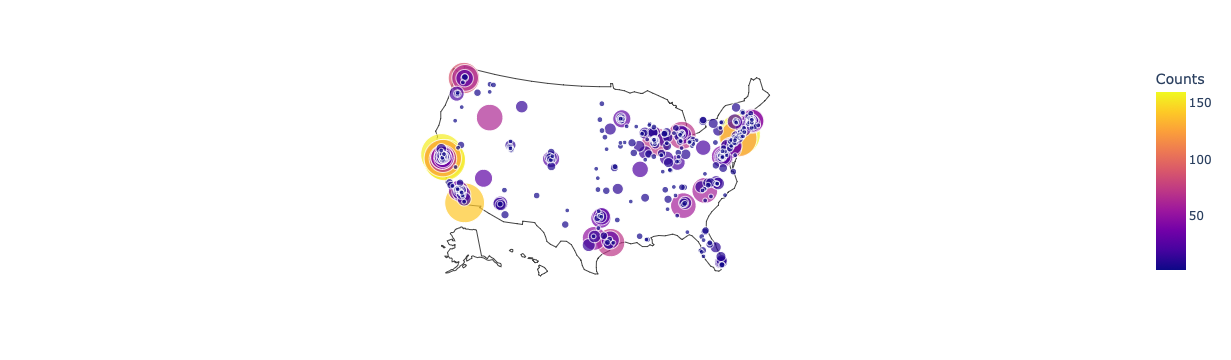

In [124]:
# Filter the DataFrame to include only U.S. entries
df_us = filtered_df

# Apply a transformation to the 'Counts' for better scaling (e.g., log transformation)
df_us['Scaled Counts'] = df_us['Counts'] / 1000

# Create the scatter geo plot
fig = px.scatter_geo(
    df_us,
    lat='Latitude',
    lon='Longitude',
    #text='City',  # Optional: label points with city names
    size='Scaled Counts',  # Use the transformed counts for size
    size_max= 30,  # Adjust max size of markers
    color='Counts',  # Color scale based on counts
    projection='albers usa'  # Choose projection type
)

# Update layout for better visualization
fig.update_geos(
    landcolor="white",
    showcountries=True,
    showcoastlines=True,
    coastlinecolor="LightGray"
)

fig.show()


# University Endowment Data

In [85]:
doe_key= 'D8TM7Li5hhre883IJ0Y6apw1qiWHmjLvbWo8bdmV'

In [87]:
# Define parameters for the API request
params = {
    "api_key": doe_key,
    "fields": "school.name,school.city,school.state,school.zip,location.lat,location.lon,school.endowment.begin,school.endowment.end",
    "per_page": 100,  # Adjust per page as necessary; max is 100
    "page": 0
}

# Initialize list to store data
endowment_data = []

# Make API requests in a loop to handle pagination
while True:
    response = requests.get(endpoint, params=params)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Error: Received status code {response.status_code}")
        print("Response content:", response.text)
        break

    data = response.json()
    
    # Check if 'results' key exists in the response data
    if "results" not in data:
        print("Error: 'results' key not found in response data")
        print("Response content:", data)
        break
    
    # Break loop if there are no more results
    if not data["results"]:
        break
    
    # Process each institution's data
    for institution in data["results"]:
        school_name = institution.get("school.name")
        city = institution.get("school.city")
        state = institution.get("school.state")
        zip_code = institution.get("school.zip")
        lat = institution.get("location.lat")
        lon = institution.get("location.lon")
        endowment_begin = institution.get("school.endowment.begin")
        endowment_end = institution.get("school.endowment.end")
        
        # Only include schools with both begin and end values for endowment
        if endowment_begin is not None and endowment_end is not None:
            # Calculate the change in endowment
            endowment_diff = endowment_end - endowment_begin
            
            # Append data to the list
            endowment_data.append({
                "school_name": school_name,
                "city": city,
                "state": state,
                "zip_code": zip_code,
                "latitude": lat,
                "longitude": lon,
                "endowment_begin": endowment_begin,
                "endowment_end": endowment_end,
                "endowment_diff": endowment_diff
            })
    
    # Increment the page count for pagination
    params["page"] += 1

# Convert the data to a DataFrame for easier handling and visualization
df_endowment = pd.DataFrame(endowment_data)

# Display the DataFrame to verify
#print(df_endowment.head())

# Save to CSV for further analysis or use with GIS tools
df_endowment.to_csv("endowment_changes.csv", index=False)
df_endowment

,school_name,city,state,zip_code,latitude,longitude,endowment_begin,endowment_end,endowment_diff
0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,711616804,673320170,-38296634
1,Amridge University,Montgomery,AL,36117-3553,32.362609,-86.174010,174817,174819,2
2,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,100321016,87756960,-12564056
3,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677,130589167,108202146,-22387021
4,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,1237611651,1144632976,-92978675
...,...,...,...,...,...,...,...,...,...
2695,Madera Community College,Madera,CA,93638-8321,36.925132,-119.997870,209236,177287,-31949
2696,Evangel University-College of Online Learning,Springfield,MO,65802-2125,37.220956,-93.262614,975016,1018528,43512
2697,Marian University-Ancilla,Plymouth,IN,46563-9475,41.337931,-86.445875,5912942,5126677,-786265
2698,Commonwealth University of Pennsylvania,Bloomsburg,PA,17815,41.007820,-76.447844,88339360,78738633,-9600727


In [101]:
# Sample 500 rows if the dataset is very large
df_sampled = df_endowment.sample(n= 1000, random_state= 42)
df_sampled

,school_name,city,state,zip_code,latitude,longitude,endowment_begin,endowment_end,endowment_diff
1339,Adelphi University,Garden City,NY,11530-0701,40.721439,-73.653321,235144798,212345742,-22799056
1222,The University of Montana-Western,Dillon,MT,59725-3598,45.208306,-112.639264,7622623,10610167,2987544
1106,Blue Mountain Christian University,Blue Mountain,MS,38610,34.672090,-89.029240,20605815,18062246,-2543569
812,Bates College,Lewiston,ME,04240,44.105299,-70.203333,466016288,418543930,-47472358
1231,Hastings College,Hastings,NE,68901,40.590250,-98.374403,113074932,101507490,-11567442
...,...,...,...,...,...,...,...,...,...
1087,Saint Cloud State University,Saint Cloud,MN,56301-4498,45.553227,-94.152657,44122000,40550000,-3572000
105,Art Center College of Design,Pasadena,CA,91103,34.169031,-118.185102,133281000,127039000,-6242000
1128,Pearl River Community College,Poplarville,MS,39470,30.844322,-89.543052,7901,7905,4
1739,Union Institute & University,Cincinnati,OH,45206,39.119091,-84.497652,1022709,855298,-167411


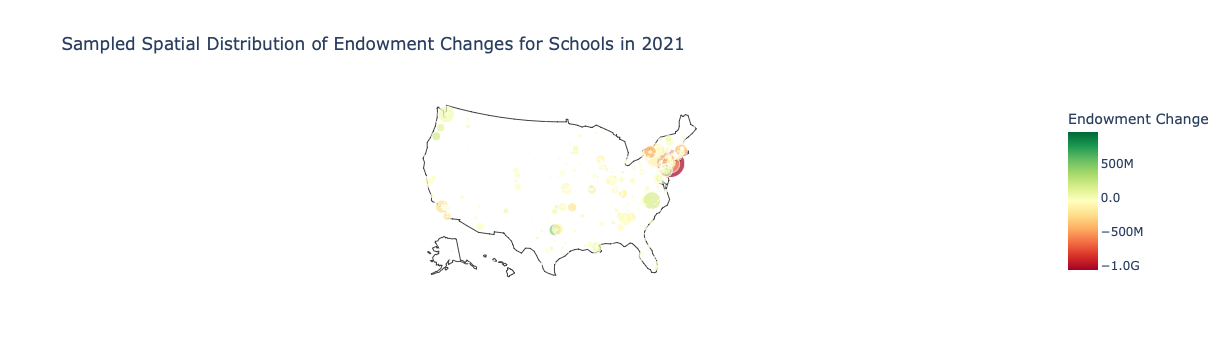

In [102]:
# Plot the data with Plotly
fig = px.scatter_geo(
    df_sampled,
    lat="latitude",
    lon="longitude",
    hover_name="school_name",
    hover_data={"endowment_begin": True, "endowment_end": True, "endowment_diff": True, "city": True, "state": True},
    color="endowment_diff",
    color_continuous_scale="RdYlGn",
    size="endowment_end",
    title="Sampled Spatial Distribution of Endowment Changes for Schools in 2021"
)

# Update map settings within update_geos (for geo-specific styling)
fig.update_geos(
    scope="usa",
    landcolor="white",
    showcountries=True,
    showcoastlines=True,
    coastlinecolor="LightGray"
)

# Update layout for color bar and additional layout settings
fig.update_layout(
    coloraxis_colorbar=dict(title="Endowment Change", tickformat=".2s")
)

fig.show()


In [125]:
df_sampled.columns

Index(['school_name', 'city', 'state', 'zip_code', 'latitude', 'longitude',
       'endowment_begin', 'endowment_end', 'endowment_diff'],
      dtype='object')

# Spatial Analysis

In [126]:
# Rename columns for consistency (optional)
df_sampled.rename(columns={'city': 'City', 'state': 'State'}, inplace=True)

# Merge the DataFrames on 'City' and 'State'
merged_df = pd.merge(filtered_df, df_sampled, on=['City', 'State'], how='inner')
merged_df

,City,State,Counts,Latitude,Longitude,Scaled Counts,school_name,zip_code,latitude,longitude,endowment_begin,endowment_end,endowment_diff
0,San Francisco,CA,154,37.779259,-122.419329,0.154,California Institute of Integral Studies,94103,37.774924,-122.416102,1968374,1532318,-436056
1,San Francisco,CA,154,37.779259,-122.419329,0.154,San Francisco Conservatory of Music,94102-6011,37.775543,-122.420292,55862000,49497000,-6365000
2,San Francisco,CA,154,37.779259,-122.419329,0.154,Golden Gate University,94105-2968,37.789374,-122.398969,50637080,43299581,-7337499
3,Santa Clara,CA,152,37.233325,-121.684635,0.152,Santa Clara University,95053,37.348362,-121.937840,1537642000,1471579000,-66063000
4,San Diego,CA,140,32.717420,-117.162772,0.140,University of San Diego,92110-2492,32.770816,-117.192073,692916000,652516000,-40400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,Hartford,CT,2,34.374043,-80.073401,0.002,Capital Community College,06103,41.768397,-72.672734,2453936,1811081,-642855
286,Elkhart,IN,2,38.815636,-77.283685,0.002,Anabaptist Mennonite Biblical Seminary,46517-1999,41.656013,-85.972165,25119343,22402933,-2716410
287,Vancouver,WA,2,41.367319,-82.107358,0.002,Clark College,98663-3598,45.636133,-122.651257,81478949,74020131,-7458818
288,Waco,TX,2,42.506484,-71.072831,0.002,McLennan Community College,76708,31.589470,-97.171228,12316797,12579159,262362


In [144]:
# correlation = merged_df['Counts'].corr(merged_df['endowment_diff'])
# print(f'Correlation coefficient between patent counts and endowment difference: {correlation}')
def calculate_correlation(data):
    return data['Counts'].corr(data['endowment_diff'], method= 'pearson')

In [145]:
n_iter= 1000
corr_values= []

for _ in range(n_iter):
    sample = merged_df.sample(frac= 1, replace= False)  # Sample without replacement
    corr = calculate_correlation(sample)
    corr_values.append(corr)

In [157]:
# Calculate confidence intervals
lower_bound = np.percentile(corr_values, 2.5)
upper_bound = np.percentile(corr_values, 97.5)

# Print results
print(f'Bootstrap Correlation Coefficient: {np.mean(corr_values): .4f}')
print(f'95% Confidence Interval: [{lower_bound}, {upper_bound}]')

Bootstrap Correlation Coefficient: -0.1845
95% Confidence Interval: [-0.18453733970183178, -0.18453733970183156]


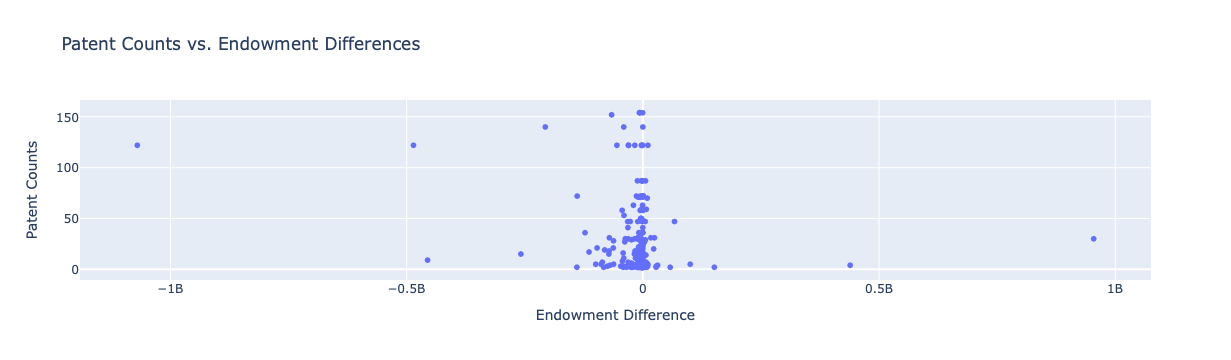

In [141]:
# Scatter plot for the merged data
fig = px.scatter(
    merged_df,
    x='endowment_diff',
    y='Counts',
    hover_name='City',
    title='Patent Counts vs. Endowment Differences',
    labels={'endowment_diff': 'Endowment Difference', 'Counts': 'Patent Counts'}
)
fig.show()

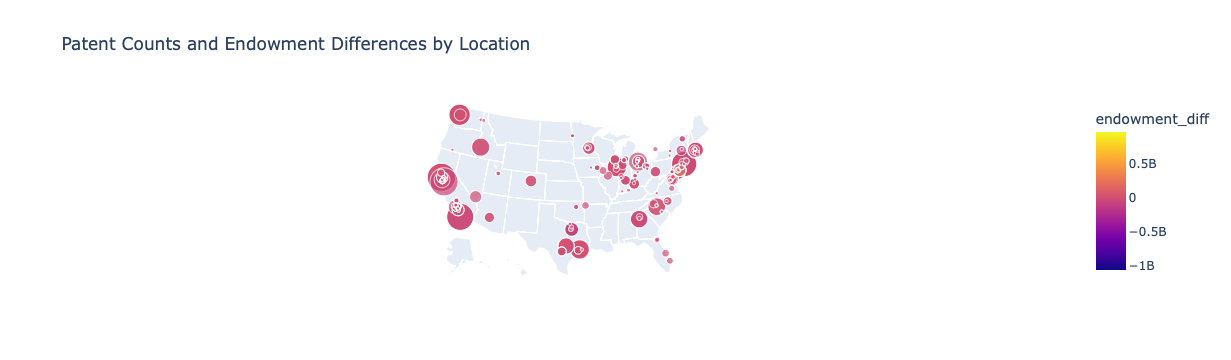

In [142]:
# Geo scatter plot
fig_map = px.scatter_geo(
    merged_df,
    lat='Latitude',
    lon='Longitude',
    size='Counts',
    color='endowment_diff',
    hover_name='City',
    title='Patent Counts and Endowment Differences by Location',
    projection='albers usa'
)
fig_map.show()